In [128]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, KFold

df=pd.read_csv('../data/datasets/training_data.csv', index_col=False, skiprows=1)
X=df.iloc[:,:-1]
y=df.iloc[:,-1].values

tuned_parameters = {
    'outer_bags':[10,100],
    'inner_bags':[10,100],
    'max_bins': [32,280,776,1024],
    'max_leaves':[2,5]
}

#best_params= 'inner_bags': 10, 'max_bins': 32, 'max_leaves': 2, 'outer_bags': 100

ebm = GridSearchCV(ExplainableBoostingClassifier(), tuned_parameters, scoring='accuracy',refit=True,
                                                     cv=5)
ebm.fit(X, y)

print("Best parameters set found on development set:")
print()
print(ebm.best_params_)
print()
print("Grid scores on development set:")
print()
print(ebm.cv_results_)
means = ebm.cv_results_['mean_test_score']
stds = ebm.cv_results_['std_test_score']
print(np.max(means))


Best parameters set found on development set:

{'inner_bags': 10, 'max_bins': 32, 'max_leaves': 2, 'outer_bags': 100}

Grid scores on development set:

{'mean_fit_time': array([  2.62582464,  13.21310434,   1.5631876 ,  11.91673031,
         2.71807461,  16.13454518,   1.98892817,  15.03610034,
         2.75893574,  19.72896757,   2.70866318,  19.51181359,
         3.05331202,  21.24696393,   3.28853788,  20.93684306,
        31.06512895, 138.43410511,  15.35228477, 121.83268375,
        28.67081523, 173.00865231,  26.26252337, 209.45190048,
        35.1044724 , 236.27449222,  32.07765708, 226.47122831,
        41.51462064, 256.73948693,  32.34787583, 262.18662624]), 'std_fit_time': array([ 0.58923942,  1.59814091,  0.31028367,  2.37392538,  0.76261648,
        0.46406994,  0.43809597,  2.27447743,  0.47735579,  0.92096662,
        0.39908511,  3.64779352,  0.65909377,  0.5175601 ,  0.49509332,
        2.59406781, 19.63627704, 26.27074583,  7.64131349, 25.81291499,
        9.34107523, 

In [ ]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, KFold

df=pd.read_csv('../data/datasets/training_data.csv', index_col=False, skiprows=1)
X=df.iloc[:,:-1]
y=df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y,random_state=42)


ebm= ExplainableBoostingClassifier(inner_bags= 10, max_bins= 32, max_leaves=2, outer_bags= 100)
ebm.fit(X_train, y_train)

show(ebm.explain_global(name='EBM'))


135
135
0.5489292863663381


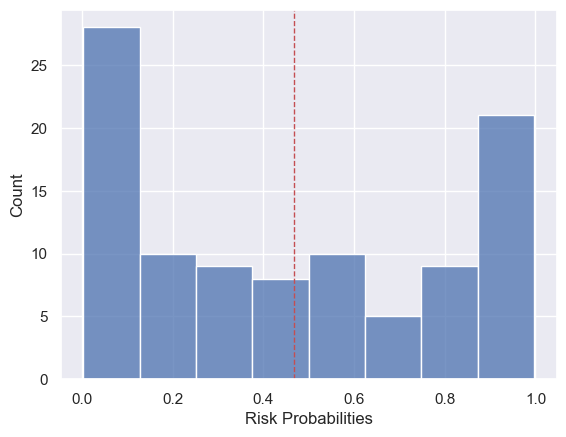

In [226]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('../data/datasets/test_science.csv', index_col=False, skiprows=0)
X_test=df.iloc[:,:]

scores= ebm.predict_proba(X_test)[:, 1]


sns.set(style="darkgrid")
g= sns.histplot(data=scores[0:100])
g.set(xlabel='Risk Probabilities')
plt.axvline(np.mean(scores[:100]), color='r', linestyle='dashed', linewidth=1)

plt.savefig("../science.pdf")


In [29]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv('../data/datasets/training_data.csv', index_col=False, skiprows=1)
X=df.iloc[:,:-1]
y=df.iloc[:,-1].values

tuned_parameters = {
    'bootstrap': [True,False],
    'max_features': [None, "sqrt", "log2"],
    'n_estimators': [50, 100, 150],
    'class_weight':[None, "balanced", "balanced_subsample"]
}


clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='accuracy',refit=True,
                                                     cv=5)
clf.fit(X, y)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
print(clf.cv_results_)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

print(np.max(means))

/var/folders/7d/4jzl81_d0z547cmhm6123rt00000gn/T/ipykernel_36210/4099302397.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.iloc[:,3]= (-1) * X.iloc[:,3].values


ValueError: Invalid parameter gamma for estimator RandomForestClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

In [91]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

df=pd.read_csv('../data/datasets/training_data.csv', index_col=False, skiprows=1)
X=df.iloc[:,:-1]
y=df.iloc[:,-1].values

tuned_parameters = {
 'penalty':['l1','l2'],
 'solver':['liblinear','saga'],
}

lr = GridSearchCV(LogisticRegression(random_state=42), tuned_parameters, scoring='accuracy',refit=True,
                                                     cv=5)
lr.fit(X, y)

print("Best parameters set found on development set:")
print()
print(lr.best_params_)
print()
print("Grid scores on development set:")
print()
print(lr.cv_results_)
means = lr.cv_results_['mean_test_score']
stds = lr.cv_results_['std_test_score']

print(np.max(means))


Best parameters set found on development set:

{'penalty': 'l1', 'solver': 'liblinear'}

Grid scores on development set:

{'mean_fit_time': array([0.02605119, 0.01995039, 0.00203242, 0.00911899]), 'std_fit_time': array([0.00443243, 0.00103575, 0.00036942, 0.00150529]), 'mean_score_time': array([0.00088239, 0.00056829, 0.00052042, 0.00052323]), 'std_score_time': array([6.85212474e-04, 7.84492922e-05, 9.91706658e-06, 1.09554310e-05]), 'param_penalty': masked_array(data=['l1', 'l1', 'l2', 'l2'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_solver': masked_array(data=['liblinear', 'saga', 'liblinear', 'saga'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'penalty': 'l1', 'solver': 'liblinear'}, {'penalty': 'l1', 'solver': 'saga'}, {'penalty': 'l2', 'solver': 'liblinear'}, {'penalty': 'l2', 'solver': 'saga'}], 'split0_test_score': array([0.88528678, 0.86284289, 0.8254

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [90]:
import xgboost as xgb

df=pd.read_csv('../data/datasets/training_data.csv', index_col=False, skiprows=1)
X=df.iloc[:,:-1]
y=df.iloc[:,-1].values



dtrain = xgb.DMatrix(X, label=y)

tuned_parameters = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(2,10,2),
 'gamma':[i/10.0 for i in range(0,10)]
}


xg = GridSearchCV(xgb.XGBClassifier(tree_method="hist"), tuned_parameters, scoring='recall',refit=True,
                                                     cv=5)
xg.fit(X, y)

print("Best parameters set found on development set:")
print()
print(xg.best_params_)
print()
print("Grid scores on development set:")
print()
print(xg.cv_results_)
means = xg.cv_results_['mean_test_score']
stds = xg.cv_results_['std_test_score']

print(np.max(means))


Best parameters set found on development set:

{'gamma': 0.3, 'max_depth': 3, 'min_child_weight': 2}

Grid scores on development set:

{'mean_fit_time': array([0.03720894, 0.03181086, 0.04012675, 0.03300767, 0.053057  ,
       0.04831328, 0.07386041, 0.10478983, 0.10217924, 0.06080861,
       0.05096602, 0.04789934, 0.07718134, 0.05747142, 0.05337758,
       0.05007024, 0.03329625, 0.03372855, 0.03329239, 0.03308096,
       0.04882874, 0.04971156, 0.04337258, 0.04363208, 0.05001583,
       0.05397053, 0.05229721, 0.04773502, 0.05993123, 0.0756597 ,
       0.09756923, 0.07836785, 0.03555999, 0.03415122, 0.04018059,
       0.03466234, 0.03904638, 0.03979959, 0.04072161, 0.04254494,
       0.04200134, 0.04433918, 0.04383612, 0.04234385, 0.04292603,
       0.04340119, 0.04550629, 0.0457046 , 0.03408766, 0.03371596,
       0.0322598 , 0.03104963, 0.03478403, 0.03598614, 0.04519057,
       0.03609619, 0.03854308, 0.03885727, 0.04088893, 0.03783216,
       0.0401577 , 0.03977842, 0.03906159, 